In [1]:
import os
while not (os.getcwd().split('\\')[-1] == 'ecological-networks' or os.getcwd().split('/')[-1] == 'ecological-networks'):
    %cd ..
import setup_paths
setup_paths.add_path()
from Species_Reintroductions import *
global DATA_TYPE
DATA_TYPE = 'Real_1D'
CASE_TO_SOLVE_init(DATA_TYPE)
get_CASE()

def CASE_init(CASE_TO_SOLVE):
    DATA_TYPE = CASE_TO_SOLVE
    CASE_TO_SOLVE_init(DATA_TYPE)
    NetworkName_Solved_df = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"Network_Solved_{DATA_TYPE.split('_')[0]}.pkl"))
    M = UnpickleObj(os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '01_Simulation_Execution', f"M_{DATA_TYPE.split('_')[0]}.pkl"))
    if DATA_TYPE.split('_')[0] == 'Syn':
        M = {k:M[k] for k in M.keys() if int(k.split('_')[2]) == 100}
    return DATA_TYPE, NetworkName_Solved_df, M

from scipy.optimize import fsolve
from scipy import stats
import scipy.linalg as la
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing


d:\Github\ecological-networks\Code\01_Species_Reintroductions
d:\Github\ecological-networks\Code
d:\Github\ecological-networks
Real_1D


In [2]:
NetworkName_lst = [
    'M_PL_003',
    'M_PL_022',
    'M_PL_060_04',
    'M_PL_060_07',
    'M_PL_060_06',
    'M_PL_040',
    'M_PL_041',
    'M_PL_030',
    'M_PL_012',
    'M_PL_060_05'
    ]
X = {}
for NetworkName in NetworkName_lst:
    FileName = os.path.join(os.getcwd(), 'Code', '01_Species_Reintroductions', '05_Analysis', 'Dyna_of_SR', f"01", f"{NetworkName}.pkl")
    X[NetworkName] = UnpickleObj(FileName)


In [3]:
print(type(X))
print(X.keys())
for key in X.keys():
    print(key, ' : ', X[key].shape)
#print(list(X[key].columns))
print([(i,v) for i,v in enumerate(list(X[key].columns))])
del key

<class 'dict'>
dict_keys(['M_PL_003', 'M_PL_022', 'M_PL_060_04', 'M_PL_060_07', 'M_PL_060_06', 'M_PL_040', 'M_PL_041', 'M_PL_030', 'M_PL_012', 'M_PL_060_05'])
M_PL_003  :  (14830, 15)
M_PL_022  :  (8750, 15)
M_PL_060_04  :  (9000, 15)
M_PL_060_07  :  (12300, 15)
M_PL_060_06  :  (10680, 15)
M_PL_040  :  (12160, 15)
M_PL_041  :  (12900, 15)
M_PL_030  :  (11850, 15)
M_PL_012  :  (12090, 15)
M_PL_060_05  :  (13500, 15)
[(0, 'n'), (1, 'm'), (2, 'L'), (3, 'S'), (4, 'A'), (5, 'C'), (6, 'N'), (7, 'g_p'), (8, 'g_a'), (9, 'beta_eff_p'), (10, 'beta_eff_a'), (11, 'Abundance'), (12, 'Ob Abundance'), (13, 'Settling Time'), (14, 'Persistence')]


In [4]:
for key in X.keys():
    Y = X[key].copy()
    Y.drop_duplicates(inplace=True, ignore_index=True)
    print(key, ' : ', X[key].shape, ' : ', Y.shape, ' : ', X[key].shape[0]-Y.shape[0])

M_PL_003  :  (14830, 15)  :  (12427, 15)  :  2403
M_PL_022  :  (8750, 15)  :  (6361, 15)  :  2389
M_PL_060_04  :  (9000, 15)  :  (6213, 15)  :  2787
M_PL_060_07  :  (12300, 15)  :  (10064, 15)  :  2236
M_PL_060_06  :  (10680, 15)  :  (9036, 15)  :  1644
M_PL_040  :  (12160, 15)  :  (10325, 15)  :  1835
M_PL_041  :  (12900, 15)  :  (10635, 15)  :  2265
M_PL_030  :  (11850, 15)  :  (9527, 15)  :  2323
M_PL_012  :  (12090, 15)  :  (9661, 15)  :  2429
M_PL_060_05  :  (13500, 15)  :  (11580, 15)  :  1920


In [5]:
DF = pd.DataFrame([], columns=list(Y.columns))
for key in X.keys():
    X[key] = X[key].apply(pd.to_numeric)
    X[key].drop_duplicates(inplace=True, ignore_index=True)
    X[key].drop(X[key][ X[key]['Ob Abundance'] == 0 ].index ,inplace = True)
    DF = pd.concat([DF,X[key]], ignore_index = True)
DF = DF.apply(pd.to_numeric)
DF.sort_values(by = ['Abundance', 'Ob Abundance'], axis = 0, inplace = True, ignore_index = True)
DF.drop(DF[ DF['Ob Abundance'] == 0 ].index ,inplace = True)
DF.reset_index(drop = True, inplace = True)

print(DF.shape)
DF.describe()

(95707, 15)


,n,m,L,S,A,C,N,g_p,g_a,beta_eff_p,beta_eff_a,Abundance,Ob Abundance,Settling Time,Persistence
count,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000,95707.000000
mean,19.868986,38.887636,89.037709,58.756622,2.231899,0.127861,0.224532,1.995552,1.396562,1.321679,0.545875,4.592794,4.587973,66.710962,0.699374
std,7.057888,10.211842,31.027830,14.130346,1.037657,0.049711,0.075355,0.343976,0.138963,0.889149,0.199603,3.548749,3.550082,47.289185,0.219126
min,2.000000,1.000000,2.000000,3.000000,0.250000,0.057208,0.000000,1.000000,1.000000,0.000000,0.000000,0.116070,0.009202,24.000000,0.055556
25%,15.000000,34.000000,68.000000,51.000000,1.636364,0.096469,0.174543,1.819059,1.299132,0.678513,0.423549,0.141740,0.138433,40.000000,0.571429
50%,20.000000,41.000000,89.000000,60.000000,2.040000,0.112013,0.208411,1.956653,1.400451,1.093330,0.515715,6.751325,6.751325,52.000000,0.757576
75%,25.000000,45.000000,111.000000,68.000000,2.571429,0.142500,0.274309,2.145524,1.481444,1.666667,0.640605,7.456359,7.453086,72.000000,0.870968
max,36.000000,55.000000,145.000000,87.000000,15.000000,1.000000,1.000000,4.376954,2.000000,11.153846,2.000000,10.646141,10.646141,299.000000,1.000000


In [6]:
D = DF.copy()
for Col_Name in list(DF.columns):
    
    X_scaled = preprocessing.MinMaxScaler().fit_transform(np.array(D[Col_Name]).reshape(-1,1))
    D[Col_Name] = X_scaled
del Col_Name, X_scaled
D.corr()


,n,m,L,S,A,C,N,g_p,g_a,beta_eff_p,beta_eff_a,Abundance,Ob Abundance,Settling Time,Persistence
n,1.000000,0.316141,0.624420,0.727956,-0.745255,-0.755086,-0.191194,-0.466723,0.669444,-0.462270,0.515467,0.129251,0.129867,0.027055,0.794514
m,0.316141,1.000000,0.796375,0.880596,0.168186,-0.407296,0.027179,0.431277,0.101095,0.079154,-0.238522,0.638893,0.639098,0.004038,0.440839
L,0.624420,0.796375,1.000000,0.887419,-0.199713,-0.401675,0.258193,0.291409,0.643994,-0.026780,0.077066,0.690829,0.691361,-0.143682,0.635650
S,0.727956,0.880596,0.887419,1.000000,-0.250697,-0.671503,-0.075856,0.078558,0.407437,-0.173693,0.085090,0.526279,0.526735,0.016432,0.715436
A,-0.745255,0.168186,-0.199713,-0.250697,1.000000,0.663247,0.268255,0.783279,-0.553518,0.596395,-0.646693,0.186774,0.186406,-0.044003,-0.531779
C,-0.755086,-0.407296,-0.401675,-0.671503,0.663247,1.000000,0.493384,0.553208,-0.231907,0.517239,-0.341778,0.019070,0.018787,-0.187710,-0.643639
N,-0.191194,0.027179,0.258193,-0.075856,0.268255,0.493384,1.000000,0.468773,0.370343,0.613668,-0.230320,0.460334,0.460780,-0.240399,-0.141102
g_p,-0.466723,0.431277,0.291409,0.078558,0.783279,0.553208,0.468773,1.000000,-0.063649,0.477549,-0.443204,0.535277,0.535489,-0.128880,-0.222258
g_a,0.669444,0.101095,0.643994,0.407437,-0.553518,-0.231907,0.370343,-0.063649,1.000000,-0.093728,0.345299,0.374751,0.375564,-0.245268,0.547577
beta_eff_p,-0.462270,0.079154,-0.026780,-0.173693,0.596395,0.517239,0.613668,0.477549,-0.093728,1.000000,-0.606627,0.412319,0.411674,-0.252932,-0.389805


(0.0, 1.0)

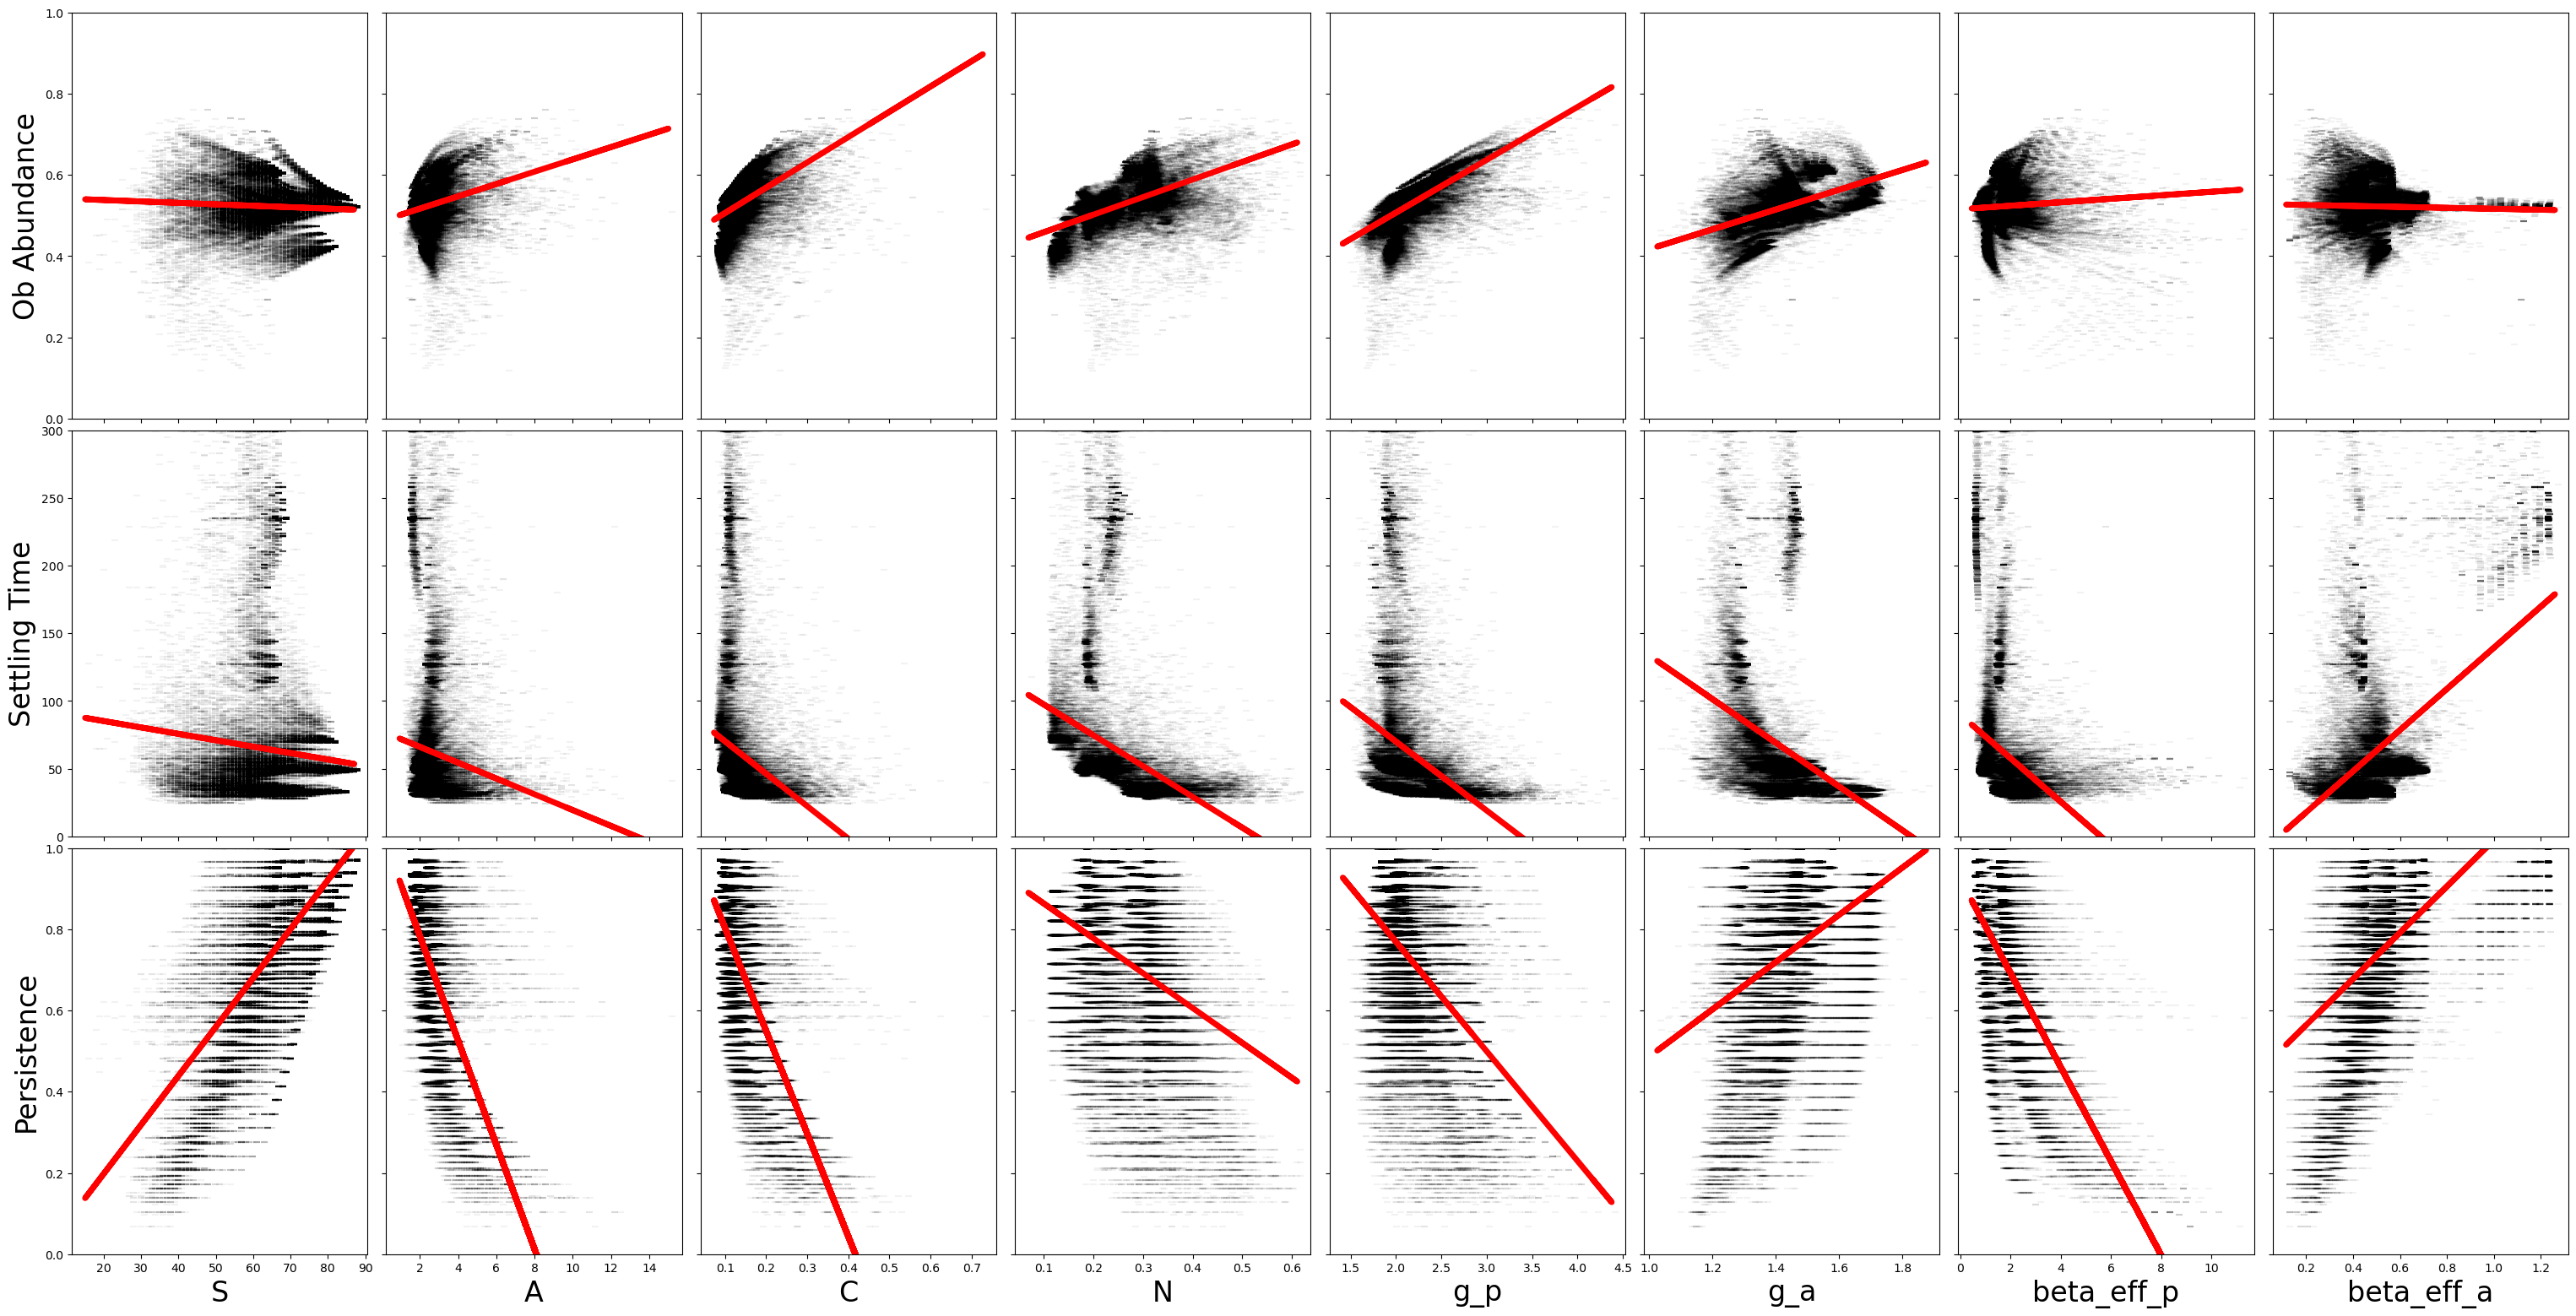

In [7]:
D = DF.copy()
D.drop(D[ D['N'] == 0 ].index ,inplace = True)
D.dropna(axis = 0, inplace = True)
D = D[D['Abundance'] > 1.0]
D.reset_index(drop = True, inplace = True)

f, ax = plt.subplots(3,4+4, figsize = (30,15), dpi = 100, sharey = 'row', sharex = 'col')
f.tight_layout(pad = 0)

V_lst = ['S','A','C','N', 'g_p', 'g_a', 'beta_eff_p', 'beta_eff_a']
Vy_lst = ['Ob Abundance', 'Settling Time', 'Persistence']

for row, Vy in enumerate(Vy_lst):
    for col, V in enumerate(V_lst):

        X_seq = np.array(D[V]).reshape(-1,1)
        Y_seq = np.array(D[Vy]).reshape(-1,1)

        if Vy == 'Ob Abundance':
            Y_seq = (Y_seq - 0) / (14-0)
        
        ax[row,col].scatter(X_seq,Y_seq, alpha = 0.05, color = 'black', marker = 1)

        regr = LinearRegression().fit(X_seq,Y_seq)
        ax[row,col].plot(X_seq,regr.predict(X_seq),color="red", linewidth = 5)

        ax[-1, col].set_xlabel(V, fontsize = 24)
        ax[row, 0].set_ylabel(Vy, fontsize = 24)

ax[0,0].set_ylim([0.0, 1.0])
ax[1,0].set_ylim([0, 300])
ax[2,0].set_ylim([0.0, 1.0])

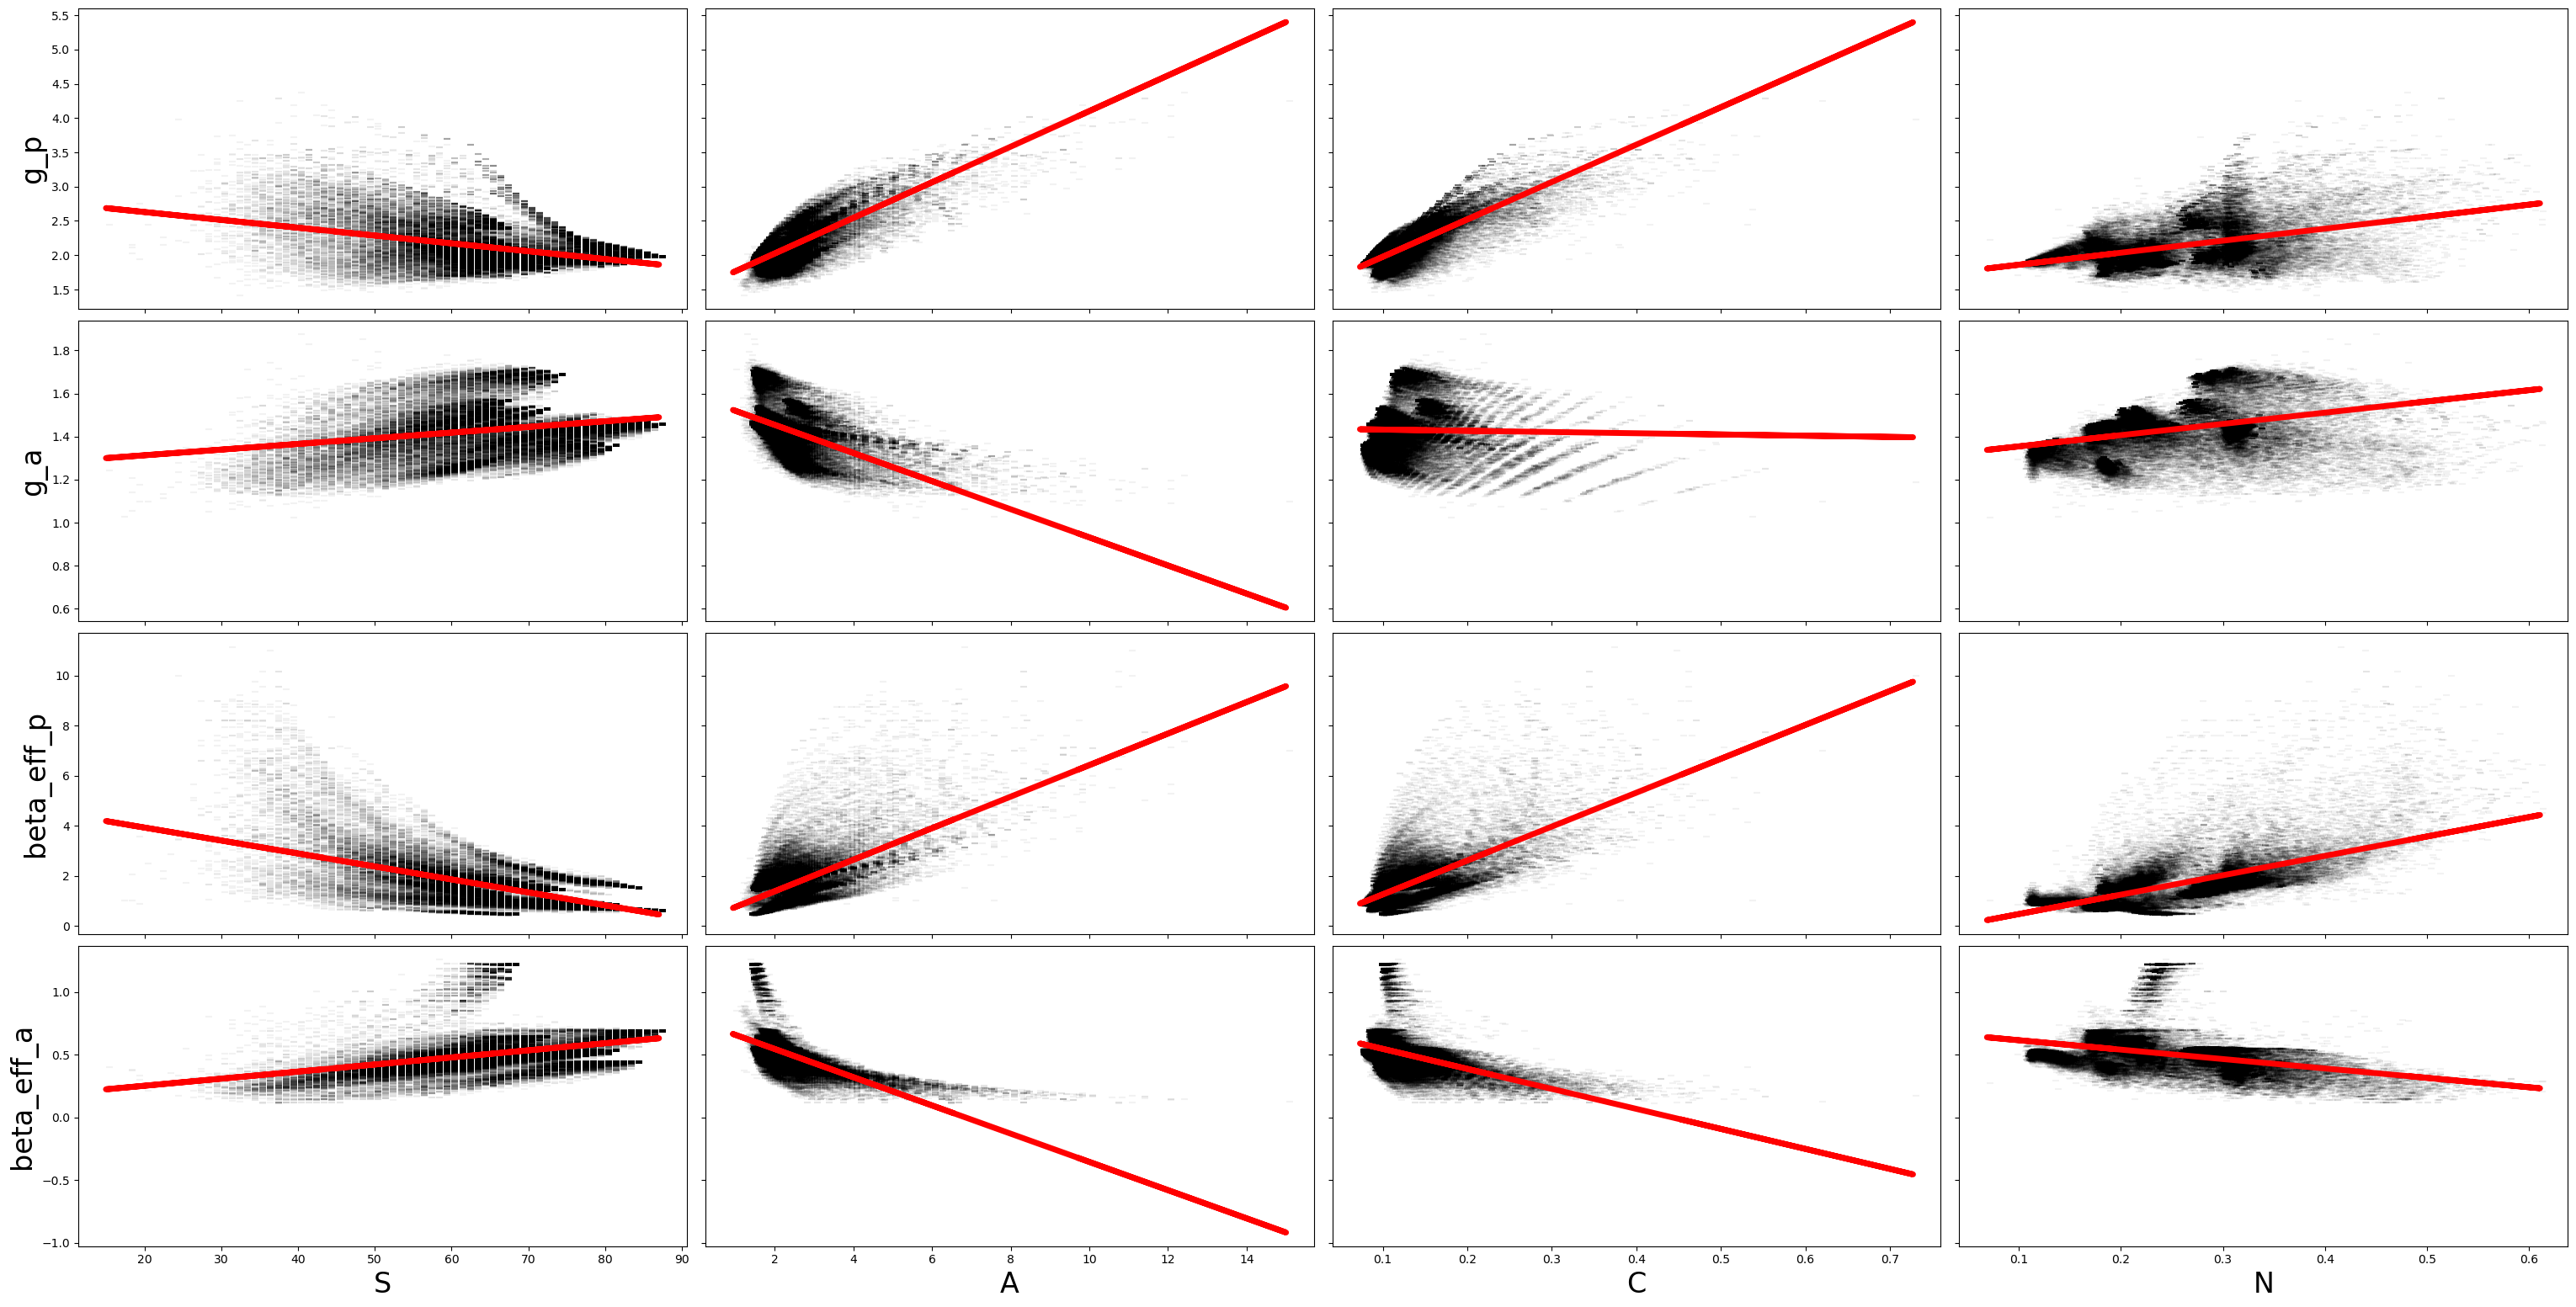

In [10]:
D = DF.copy()
D.drop(D[ D['N'] == 0 ].index ,inplace = True)
D.dropna(axis = 0, inplace = True)
D = D[D['Abundance'] > 1.0]
D.reset_index(drop = True, inplace = True)

f, ax = plt.subplots(4,4, figsize = (30,15), dpi = 100, sharey = 'row', sharex = 'col')
f.tight_layout(pad = 0)

V_lst = ['S','A','C','N']
Vy_lst = ['g_p', 'g_a', 'beta_eff_p', 'beta_eff_a']

for row, Vy in enumerate(Vy_lst):
    for col, V in enumerate(V_lst):

        X_seq = np.array(D[V]).reshape(-1,1)
        Y_seq = np.array(D[Vy]).reshape(-1,1)

        if Vy == 'Ob Abundance':
            Y_seq = (Y_seq - 0) / (14-0)
        
        ax[row,col].scatter(X_seq,Y_seq, alpha = 0.05, color = 'black', marker = 1)

        regr = LinearRegression().fit(X_seq,Y_seq)
        ax[row,col].plot(X_seq,regr.predict(X_seq),color="red", linewidth = 5)

        ax[-1, col].set_xlabel(V, fontsize = 24)
        ax[row, 0].set_ylabel(Vy, fontsize = 24)

#ax[0,0].set_ylim([0.0, 1.0])
#ax[1,0].set_ylim([0, 300])
#ax[2,0].set_ylim([0.0, 1.0])

In [12]:
DATA_TYPE, _, M = CASE_init('Real_1D')
M_df = M['M_PL_041']
A_proj, B_proj = getProjectedNet(M_df, flag = [True, True])
beta_eff_p, _, _ = ODE_Solve_Low(t0=0,tf=100,num=50,x_low=0,A=np.array(A_proj))
beta_eff_a, _, _ = ODE_Solve_Low(t0=0,tf=100,num=50,x_low=0,A=np.array(B_proj))
print(beta_eff_p, beta_eff_a)

1.4323889690556362 0.5547264588716042


In [48]:
n,m = M_df.shape

one_p = np.ones((n,1))
one_a = np.ones((m,1))

s_in_p = np.array([A_proj.iloc[i,:].to_numpy().sum() for i in range(n)]).reshape(-1,1)
s_in_a = np.array([B_proj.iloc[i,:].to_numpy().sum() for i in range(m)]).reshape(-1,1)

beta_p = (np.dot(np.dot(one_p.T, A_proj),s_in_p)[0,0]) / (np.dot(np.dot(one_p.T, A_proj),one_p)[0,0])
beta_a = (np.dot(np.dot(one_a.T, B_proj),s_in_a)[0,0]) / (np.dot(np.dot(one_a.T, B_proj),one_a)[0,0])
print(beta_p, beta_a)

13.974913702854877 9.082099617174805
